## Simple Linear Regression Assignment
### Delivery Time


Delivery_time -> Predict delivery time using sorting time 

In [3]:
#importing the libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [4]:
df = pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
#renaming the columns 
df1 = df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'}, axis = 1)

In [7]:
df1.corr()
#The correlation between the variables is 0.825 which is a good correlation

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


C:\Users\91901\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

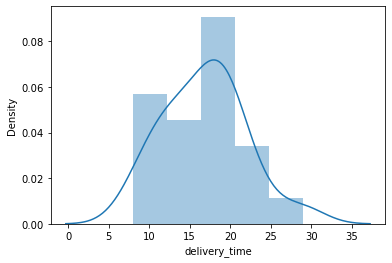

In [8]:
sns.distplot(df1['delivery_time']) #density plot to check the distribution of the data

C:\Users\91901\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

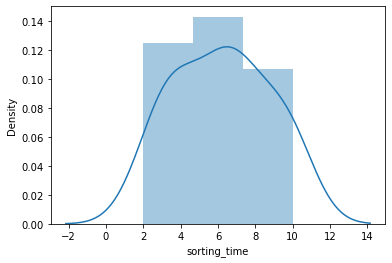

In [9]:
sns.distplot(df1['sorting_time'])

In [10]:
#fitting a linear regression model;

import statsmodels.formula.api as smf

In [11]:
model = smf.ols("delivery_time~sorting_time", data = df1).fit()

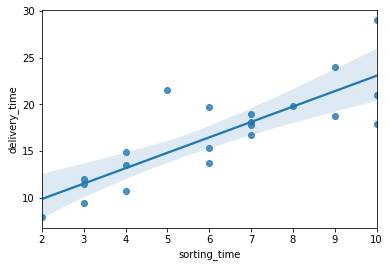

In [12]:
sns.regplot(x='sorting_time',y='delivery_time', data = df1);

In [13]:
#testing the model 
#coefficients 
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [14]:
#Bo = 6.582734
#B1 = 1.649020

In [15]:
#p value and t value
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [16]:
#P value for the slope is 0.000004 < 0.05.

In [17]:
#R squared values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [18]:
# From the R squared value we can derive that it is a moderate model 

In [19]:
# Predicting for sorting time 11 and 13
data = pd.Series([11,13])

In [20]:
data_pred = pd.DataFrame(data, columns=['sorting_time'])

In [21]:
data_pred

,sorting_time
0,11
1,13


In [22]:
model.predict(data_pred)

0    24.721953
1    28.019993
dtype: float64